# Exercises for Lectures 1 & 2

## Exercise 1. Volume of a D-sphere.

JL Euste

CMP

13 Feb 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
np.random.seed(11)

In [3]:
class hit_or_miss1(object):
            
    def gen_rand(self):
        self.rand_num = np.random.random((int(self.M),self.d))*self.r
        
    def is_in(self):
        self.hits = np.sum(self.rand_num**2,axis=1) < self.r**2
    
    def calc_volume(self,d=2,r=1,M=1e6):
        
        self.d,self.r,self.M = d,r,int(M)
        
        self.gen_rand()
        self.is_in()
        
        self.V = ((2.*self.r)**self.d)*np.sum(self.hits)/self.M
        
        self.sigma = np.cumsum((4.*self.hits[:self.M] - self.V)**2)[-1] / (self.M*(self.M-1))
        

        return self.V, self.sigma # return estimator and error of d-dimensional sphere

In [4]:
hom = hit_or_miss1()

Try for D=3 with one million points. Expected: 4pi/3 = 4.19

In [5]:
hom.calc_volume(d=3)

(4.190944, 8.381896381781518e-06)

Try for D=10 with one million points. Expected: pi^5/120 = 2.55

In [6]:
hom.calc_volume(d=10)

(2.49856, 6.233076415417818e-06)

# Exercise 2. Error estimate as a function of sampled points.

For the 3D sphere, calculate at fixed sampling of points N ϵ [1000,4000] the error in the evaluation of the integral and show that it scales as O(1/sqrt(N) with a plot.

In [7]:
class hit_or_miss2(object):

  def __init__(self,d=2,r=1,M=1000):
    self.d,self.r,self.M = d,r,M

  def gen_rand(self,M):
    self.rand_num = np.random.random((int(M),self.d))*self.r
      
  def is_in(self):
    self.hits = np.sum(self.rand_num**2,axis=1) < self.r**2

  def calc_volume(self,M_max=None):

    if M_max is None: M_max=self.M

    self.V = ((2.*self.r)**self.d)*np.sum(self.hits[:M_max])/M_max

    return self.V


  def make_plot(self):
    xvals = np.arange(self.N_min,self.N_max+1)

    fig,ax = plt.subplots()

    ax.loglog(xvals,self.sigmas,'r-')

    fit_func = lambda n,alpha: n**(alpha)
    popt, pcov = curve_fit(fit_func, xvals, self.sigmas)

    ax.loglog(xvals,fit_func(xvals,popt[0]),'k--',
            label=r'$O(N^{\alpha}), \alpha=$'+ f'{popt[0]:.2f}')
    ax.legend()
    
    ax.set_title(f'd={self.d}, N_max={self.N_max}, vol={self.volumes[-1]:.2f}')
    ax.set_xlabel('M')
    ax.set_ylabel('standard deviation')

    plt.show()


  def error_analysis(self,N_min=1000,N_max=4000):
    self.N_min,self.N_max = int(N_min),int(N_max)

    self.volumes = np.empty(self.N_max-self.N_min+1)
    self.vars = np.empty(self.N_max-self.N_min+1)
    self.sigmas = np.empty(self.N_max-self.N_min+1)

    self.gen_rand(self.N_max)
    self.is_in()

    for m in range(self.N_min,self.N_max+1):
      v_m = self.calc_volume(M_max=m)
      dA = np.cumsum((4.*self.hits[:m] - v_m)**2)[-1]

      i = m - self.N_min
      self.volumes[i] = v_m
      self.vars[i] = dA
      self.sigmas[i] = np.sqrt(dA/(m*(m-1)))
    
    self.make_plot()

    



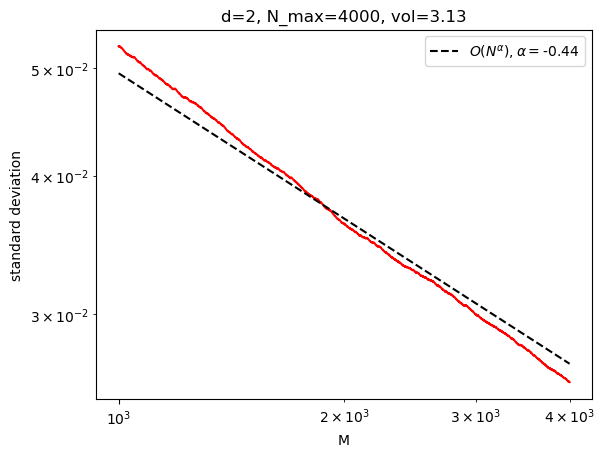

In [8]:
hom = hit_or_miss2()
hom.error_analysis()

Try using more points.

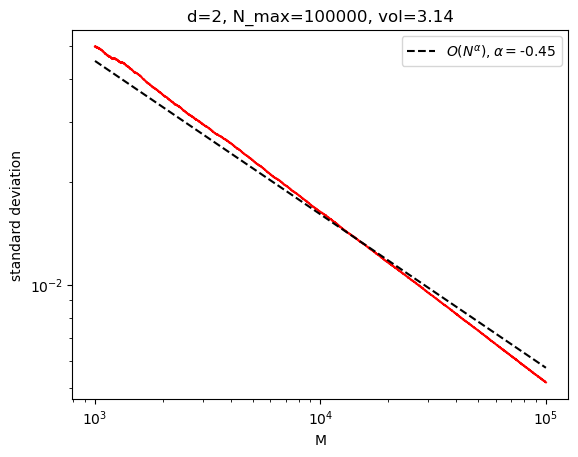

In [9]:
hom.error_analysis(N_max=1e5)

Try for 3d sphere.

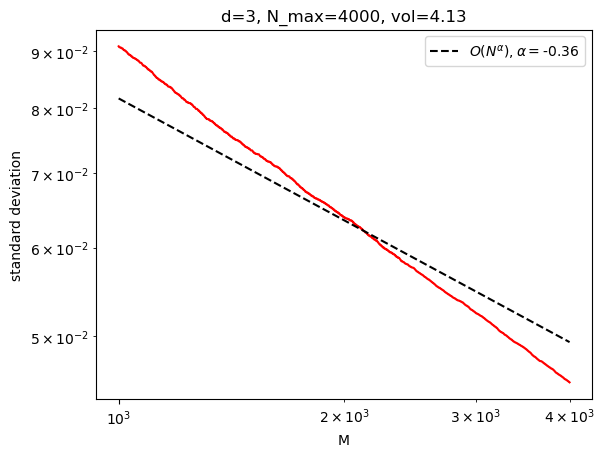

In [10]:
hom = hit_or_miss2(d=3)
hom.error_analysis()

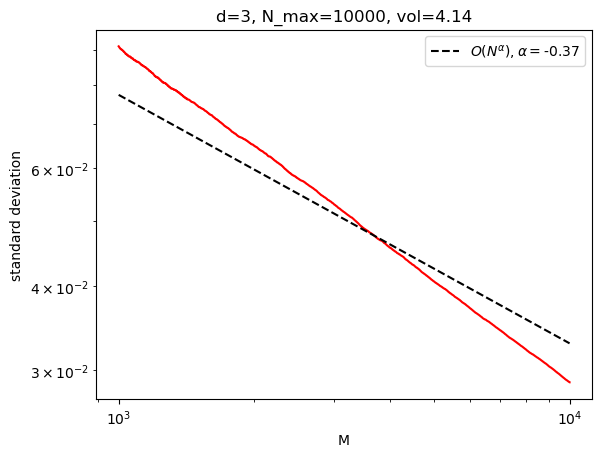

In [11]:
hom.error_analysis(N_max=1e4)

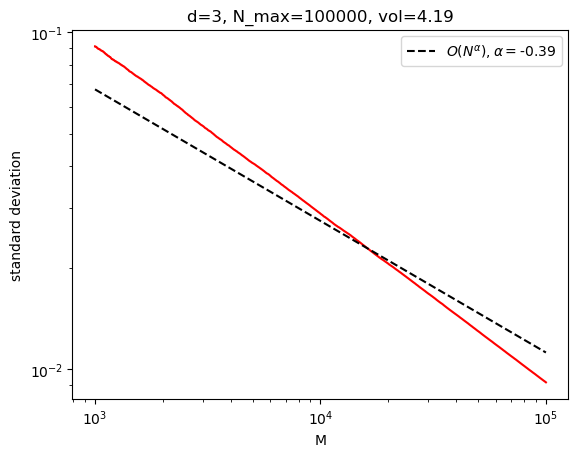

In [12]:
hom.error_analysis(N_max=1e5)

Try for 10-dimensional hypersphere.

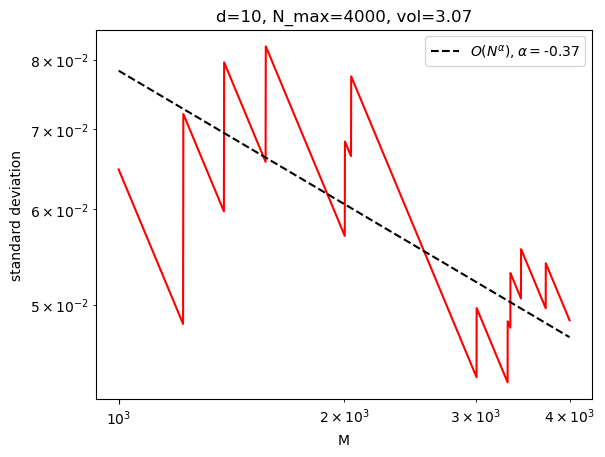

In [13]:
hom = hit_or_miss2(d=10)
hom.error_analysis()

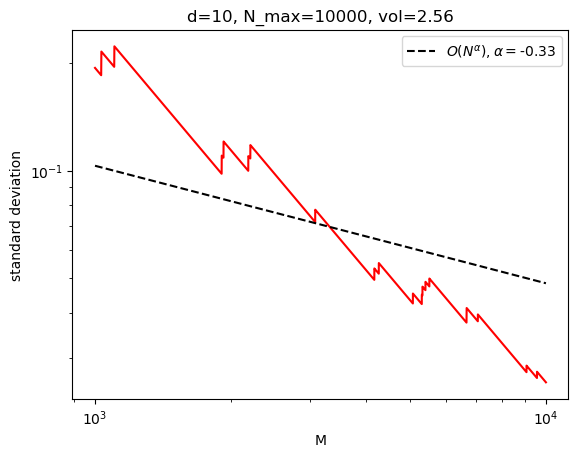

In [14]:
hom.error_analysis(N_max=1e4)

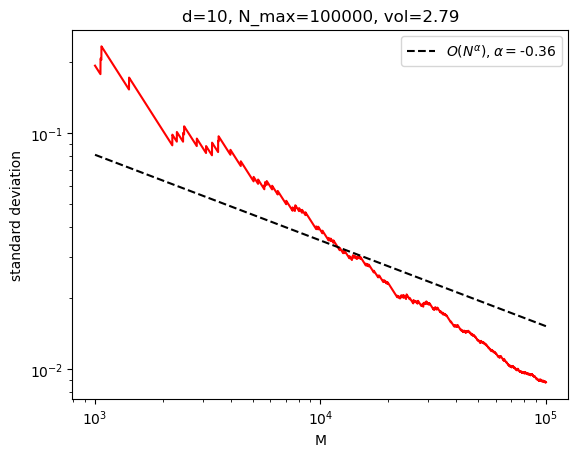

In [15]:
hom.error_analysis(N_max=1e5)

It seems that we have higher errors for lower N in 10d. Try restricting N to higher range of values.

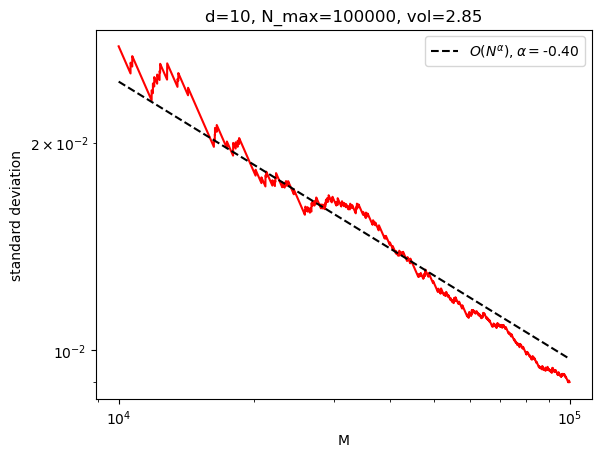

In [16]:
hom.error_analysis(N_min=1e4, N_max=1e5)